# 1. Definition / Introduction
A **Random Forest**  is an ensemble (*gr. of items who perform as a whole*) supervised machine learning method used for **classification, regression, and other tasks** that operates by constructing a multitude (*large no.*) of decision trees at training time.

**Random Forest** creates
* decision trees on the given data samples,
* gets prediction from each tree and
* selects the best solution by means of voting.

**Random forest algorithm** combines multiple decision-trees, resulting in a forest of trees, hence the name **Random Forest.**

#### In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

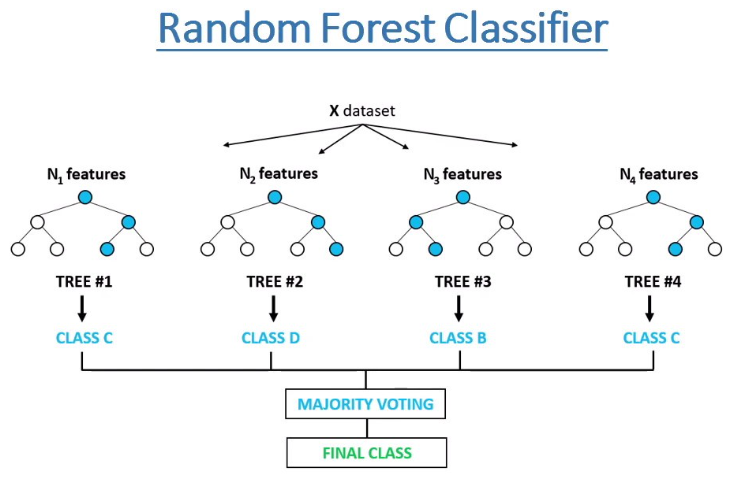

**Thanks to:**
* [Random Forest Classifier Tutorial](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)

In [1]:
# install the category_encoders library
!pip install category_encoders

# 2. Import libraries

In [2]:
import numpy as np              # required for linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
                                # split dataset into train and test set.
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [3]:
# import a way to issue warning messages.
import warnings
# ignore or suppress all warnings.
warnings.filterwarnings('ignore')

# 3. Load dataset
#### Car Evaluation Database
here the model evaluates cars according to the following concept structure:

- CAR, car acceptability<br>
-PRICE, overall price<br>
-buying, buying price<br>
-maint, price of the maintenance<br>
-TECH, technical characteristics<br>
-COMFORT, comfortable<br>
-doors, number of doors<br>
-persons, capacity in terms of persons to carry<br>
-lug_boot, the size of luggage boot<br>
-safety, estimated safety of the car<br>

#### Input attributes
are printed in lowercase. Besides the target concept **(CAR),** the model includes three intermediate concepts:
- PRICE,
-TECH,
-COMFORT.

Every concept is in the original model related to its lower level descendants by a set of examples.


The **Car Evaluation Database** contains examples with the structural information removed, i.e., directly relates **CAR** to the six input attributes:

- buying,
- maint,
- doors,
- persons,
- lug_boot,
- safety.
<br>

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

#### Attribute Information:

* **Class Values:** unacc, acc, good, vgood

#### Attributes:
* **buying:** vhigh, high, med, low.
* **maint:** vhigh, high, med, low.
* **doors:** 2, 3, 4, 5, more.
* **persons:** 2, 4, more.
* **lug_boot:** small, med, big.
* **safety:** low, med, high.

In [4]:
# data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
data = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_14_Random_Forest_Classifier/ML_14_rfc_car_evaluation.csv"

df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 4. Exploratory data analysis (EDA)

## 4.1 Shape matrix (rows & columns) of dataset

In [5]:
# view dimensions of dataset
df.shape

(1728, 7)

## 4.2 Missing values in variables (dataset)


In [6]:
# Check if any column contains null values
null_columns = df.isnull().any()
print("\nAny nulls in columns:\n", null_columns)

# Check if any row contains null values
null_rows = df.isnull().any(axis=1)
print("\nAny nulls in rows:\n", null_rows)

# Check if any value in the entire DataFrame is null
any_null = df.isnull().values.any()
print("\nAny nulls in DataFrame:", any_null)

# check missing values in variables
null_sum = df.isnull().sum()
print("\nMissing values in variables:\n", null_sum)


Any nulls in columns:
 0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

Any nulls in rows:
 0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

Any nulls in DataFrame: False

Missing values in variables:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


## 4.3 Rename features (column) names
We can see that the dataset does not have proper column names. The columns are merely labelled as **0, 1, 2, 3, . . .** and so on. We should give proper names to the columns.

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# frequency distribution of values and counts of categorical variables
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print("\nFrequency distribution of variable %s:" % col)
    print(df[col].value_counts())


Frequency distribution of variable buying:
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Frequency distribution of variable maint:
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Frequency distribution of variable doors:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Frequency distribution of variable persons:
persons
2       576
4       576
more    576
Name: count, dtype: int64

Frequency distribution of variable lug_boot:
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Frequency distribution of variable safety:
safety
low     576
med     576
high    576
Name: count, dtype: int64

Frequency distribution of variable class:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


## 4.4 Explore target class variable

In [11]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


We can see that the **doors** and **persons** are **categorical** in nature.

## Summary of variables
* There are **7 variables** in the dataset. All the variables are of categorical data type.
* These are given by **buying, maint, doors, persons, lug_boot, safety and class.**
* **class** is the **target** variable.

# 5. Stripping the feature vector (independent) and target (dependent) variable

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

# 6. Split data into separate training and test set

In [13]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)

## 6.1 Shape of train and test dataset

In [14]:
# check the shape of X_train and X_test
print("\nShape matrix (rows and columns) of training dataset :\n", X_train.shape)
print("\nShape matrix (rows and columns) of test dataset :\n", X_test.shape)
# X_train.shape, X_test.shape


Shape matrix (rows and columns) of training dataset :
 (1157, 6)

Shape matrix (rows and columns) of test dataset :
 (571, 6)


# 7. Feature Engineering
**Feature Engineering** is the process of transforming raw data into useful features that help to understand the model in better way and increase its predictive power.

## 7.1 Feature engineering on different types of variables, by checking the data types of variables.

In [15]:
# check data types in X_train
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


## 7.2 Encode categorical variables
**Encoding categorical variables** refers to the process of *converting categorical data (data that can be divided into distinct groups) into a numerical format* that can be used by machine learning algorithms.

Since most machine learning algorithms require numerical input, categorical variables must be transformed to numerical values.

In [16]:
# import category encoders
import category_encoders as ce

In [17]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


**buying:**
- vhigh - 1
- high  - 2
- low   - 3
- med   - 4

**maint:**
- vhigh - 1
- high  - 2
- low   - 3
- med   - 4



In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# 8. Build model - Random Forest Classifier (RFC)

* **y_test** are the **true class labels** and
* **y_pred** are the **predicted class labels** in the **test-set.**
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

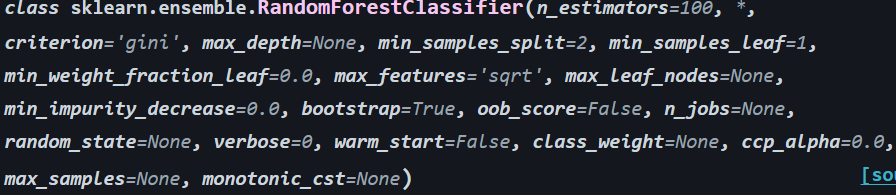

In [20]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Check accuracy score
from sklearn.metrics import accuracy_score

## 8.1 Random Forest Classifier model with **`n_estimators=10`**

In [21]:
# instantiate the classifier
rfc_10 = RandomForestClassifier(n_estimators=10, random_state=0)

# train (fit) the model
rfc_10.fit(X_train, y_train)

# Predict the Test set results
y_pred_10 = rfc_10.predict(X_test)

# Check accuracy score
print('\nModel accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_10)))


Model accuracy score with 10 decision-trees : 0.9247


## 8.2 Random Forest Classifier model with default parameters **`n_estimators=100`**

In [22]:
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# train (fit) the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print('\nModel accuracy score with default decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default decision-trees : 0.9457


The **RFC** model accuracy score with
* **10** decision-trees is **0.9247**<br>
* **100** decision-trees is **0.9457.**

So, as expected accuracy increases with number of decision-trees in the model.

# 9. Find important features with Random Forest model

retrieves the **feature importance scores** from a trained **Random Forest classifier,** organizes them into a **Pandas Series** with
* the **feature names** as the **index,**
* **sorts** these **scores in descending order,** and
* then displays the **sorted scores.**

This helps in understanding which features contribute most to the model's predictions.

In [23]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
doors,0.072389


Here,
* the most important feature is **safety**
* the least important feature is **doors**

# 10. Visualize feature scores of the features

the 'viridis' palette is a popular colorful palette. Seaborn offers several built-in color palettes such as *'deep', 'muted', 'pastel', 'bright', 'dark', and 'colorblind'*

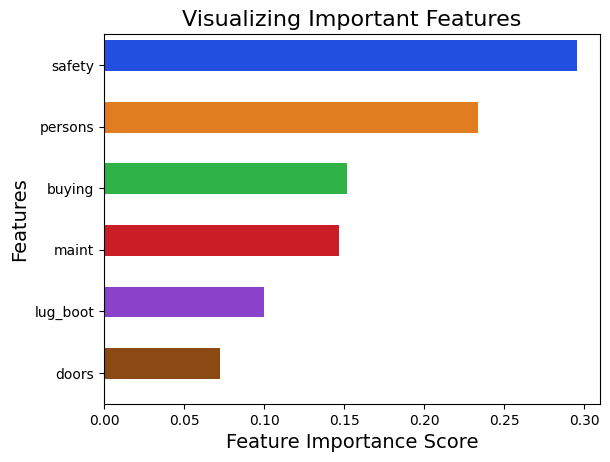

In [24]:
# visualize the feature scores with matplotlib and seaborn.
# creating a seaborn bar plot
# sns.barplot(x=feature_scores, y=feature_scores.index, palette='viridis')
# sns.barplot(x=feature_scores, y=feature_scores.index, palette='deep')
# sns.barplot(x=feature_scores, y=feature_scores.index, palette='muted')
# sns.barplot(x=feature_scores, y=feature_scores.index, palette='pastel')
# sns.barplot(x=feature_scores, y=feature_scores.index, palette='dark')
# sns.barplot(x=feature_scores, y=feature_scores.index, palette='colorblind')

ax = sns.barplot(x=feature_scores, y=feature_scores.index, palette='bright', ci=None)

# Reduce the bar width by iterating over the patches and adjusting their width
for bar in ax.patches:
    bar.set_height(0.5)  # Set the bar height to 0.5, adjust as needed

# Add labels to the graph
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add title to the graph
plt.title("Visualizing Important Features", fontsize=16)

# Visualize the graph
plt.show()

* the **custom_palette** is created using **sns.color_palette** with the **"coolwarm"** color map, which creates a gradient from cool to warm colors.

* The **n_colors** parameter ensures the number of colors matches the number of features.

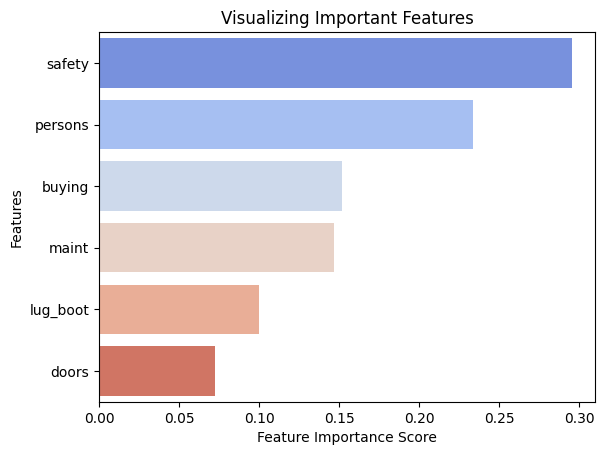

In [25]:
# Define a custom color palette
custom_palette = sns.color_palette("coolwarm", n_colors=len(feature_scores))

# Creating a seaborn bar plot with the custom palette
sns.barplot(x=feature_scores, y=feature_scores.index, palette=custom_palette)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

# 11. Build Random Forest model on selected features
Let's drop the least important feature **doors** from the model, and rebuild the model to check its effect on accuracy.

## 11.1 Stripping the important feature vector (independent) and target (dependent) variable


In [26]:
# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis=1)
y = df['class']


## 11.2 Split the dataset into separate training and test set

In [27]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)

# 12. Encode categorical variables with important feature vector

#### What is OrdinalEncoder?
**OrdinalEncoder** is a class in the `sklearn.preprocessing` module of the Scikit-learn library. It is used to convert categorical data into numerical data, which can be processed by machine learning algorithms.

This is particularly useful when dealing with algorithms that require numerical input, such as
* linear regression,
* support vector machines, and
* neural networks.

#### How it Works
**OrdinalEncoder** assigns an integer to each category, transforming the categorical feature into an integer array.

For example, if you have a feature with categories `['low', 'medium', 'high']`, the **OrdinalEncoder** might convert these to `[0, 1, 2].`

In [28]:
# encode the selected categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# 13. Rebuild the Random Forest Classifier with selected feature vector
* **y_test** are the **true class labels** and
* **y_pred** are the **predicted class labels** in the **test-set.**
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## 13.1 Random Forest Classifier model with **`n_estimators=10`**

In [29]:
# instantiate the classifier 'n_estimators=10'
rfc_10 = RandomForestClassifier(n_estimators=10, random_state=0)

# train (fit) the model on the training set
rfc_10.fit(X_train, y_train)

# predict on the test set results
y_pred_10 = rfc_10.predict(X_test)

# check accuracy score
print('\nModel accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_10)))


Model accuracy score with 10 decision-trees : 0.9264


## 13.2 Random Forest Classifier model with default parameters **`n_estimators=100`**

In [30]:
# instantiate the classifier 'n_estimators=100'
rfc = RandomForestClassifier(random_state=0)

# train (fit) the model on the training set
rfc.fit(X_train, y_train)

# predict on the test set results
y_pred = rfc.predict(X_test)

# check accuracy score
print('\nModel accuracy score with default decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default decision-trees : 0.9264


The **RFC** model accuracy score with **selected feature vector**
* **10** decision-trees is **0.9264**<br>
* **100** decision-trees is **0.9264.**

Since, the **accuracy** is same with both the **10 and 100 decision trees.** But, as expected the accuracy has to increases with number of decision-trees in the model. Hence drop this approach.

# 14. Confusion matrix implementation
A **confusion matrix** is a table used to evaluate the performance of a classification algorithm.
* It provides a summary of the prediction results on a classification problem.
* The matrix compares the **actual target values** with those **predicted by the machine learning** model.
* This comparison helps in understanding the types of errors made by the classifier and how well it performs.

The confusion matrix consists of four main terms:
1. **True Positives (TP):** The number of correct positive predictions.
2. **True Negatives (TN):** The number of correct negative predictions.
3. **False Positives (FP):** The number of incorrect positive predictions (Type I error).
4. **False Negatives (FN):** The number of incorrect negative predictions (Type II error).

The confusion matrix is usually represented in a **2x2 table for binary classification,** but it can be extended to multi-class problems.

In [31]:
# print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


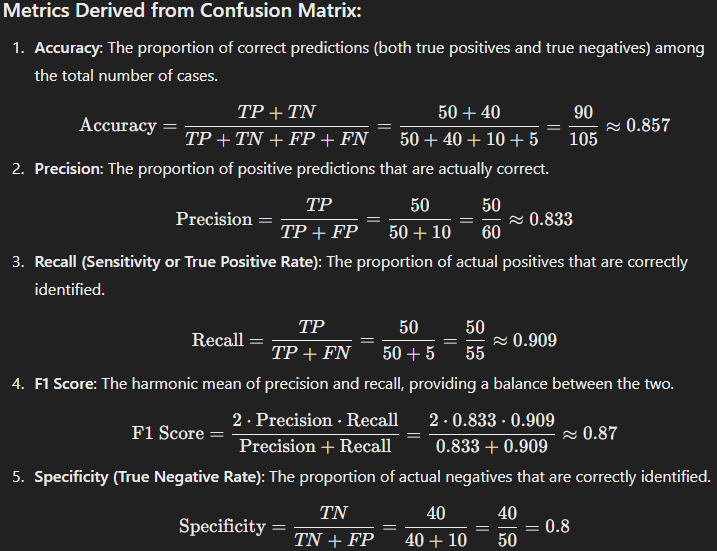

# 15. Classification Report
A **classification report** is a detailed report that provides various metrics to evaluate the performance of a classification model. It is commonly used in machine learning to summarize the performance of a classification algorithm.

The classification report includes the following key metrics for each class:

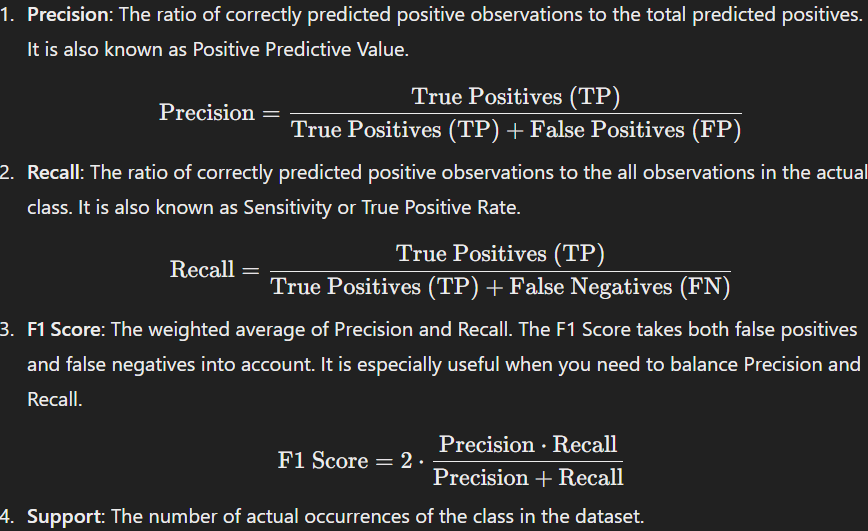

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



# 16. Results and conclusion
* A Random Forest Classifier to predict the safety of the car.
* Build two models, one with 10 decision-trees and another one with 100 decision-trees.
* The model accuracy score with **10 decision-trees is 0.9247** but the same with **100 decision-trees is 0.9457.** So, as expected accuracy increases with number of decision-trees in the model.
* The most important feature is **safety** and least important feature is **doors**.
* **Confusion matrix** and **classification report** are another tool to visualize the model performance. They yield good performance.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extracting the individual counts
TN, FP, FN, TP = cm.ravel()

# Compute the metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
specificity = TN / (TN + FP)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

ValueError: too many values to unpack (expected 4)